In [238]:
# Annual Population Change 1993-2023 Last 30 years ın Ireland
# Annual Population Change being specifectly immigration and emigration 2019-2023 After Bretix 
# Annual Population Change being specifectly annual deaths/annual births during corona time 
# Annual Population Change being specifectly annual deaths/annual births during corona time 

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [240]:
data=pd.read_csv('PEA15.20231021T091018.csv')

In [241]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [242]:
data.head

<bound method NDFrame.head of               STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]>

In [243]:
data.head(8) #Why I have chosed just 8 rows cause of different components . We have different components they are displayed 8 rows .

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1


#We can understand now for Year 1993 ; Annual births Annual deaths Natural increase Immigrants Emigrants Net migration Population change Population

I am looking for how changed Ireland population last 30 years and I am gonna predict about next year population ; will they increase or not ? If Ireland population is gonna increase , net migraiton or natural increasing will be main reason ? Beside that I am gonna have a look , ıf there is increasing for population and it will have continued as before , how will be net migraiton or natural increasing . If the government wanna keep population as same as last year and how should be difference for accepting immigrations in 2024 ? I am gonna have a look answers of this questions .

In [244]:
data.shape #We can have a look data shape . In this data we have 248 rows and 5 columns .

(248, 5)

In [245]:
data.describe() #We can learn how many variables we have and max value or min value or more

,Year,VALUE
count,248.000000,248.000000
mean,2008.000000,582.497581
std,8.962359,1434.688854
min,1993.000000,-27.500000
25%,2000.000000,29.800000
50%,2008.000000,48.350000
75%,2016.000000,73.300000
max,2023.000000,5281.600000


In [246]:
data.describe(include=object) #We can search datas detailly here . As you can see , for example we can understand how many unique or frequency values

,STATISTIC Label,Component,UNIT
count,248,248,248
unique,1,8,1
top,Annual Population Change,Annual births,Thousand
freq,248,31,248


In [247]:
data.info() #We can have an idea about our data . How many floats , integers or objects we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  248 non-null    object 
 1   Year             248 non-null    int64  
 2   Component        248 non-null    object 
 3   UNIT             248 non-null    object 
 4   VALUE            248 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ KB


After all , before I start I have to be sure there is no missing data . Unless I have any missing data , I can start read data but ıf I have , I should detect them and have to find a solution . Maybe ; I can chance them as ' 0' , I can take value from another randomly slected sample , I can use mean or median , I can use interpolate .

In [248]:
null_filter_i = data.isnull()  #I am having look is there any gap in this data . If we have it seems True .

In [249]:
null_filter_i.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [250]:
null_filter_i.shape


(248, 5)

In [251]:
null_filter_i.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

In [252]:
null_filter_n=data.notnull()

In [253]:
null_filter_n.head(15)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True
4,True,True,True,True,True
5,True,True,True,True,True
6,True,True,True,True,True
7,True,True,True,True,True
8,True,True,True,True,True
9,True,True,True,True,True


In [254]:
null_filter_n.shape

(248, 5)

In [255]:
null_filter_n.count() #248 values we have for each groups . There is no missing data 

STATISTIC Label    248
Year               248
Component          248
UNIT               248
VALUE              248
dtype: int64

If we had missing datas , we could have found them as below as separetly having look all columns .

In [256]:
null_filter_statıstıc = data['STATISTIC Label'].isnull() 
null_filter_statıstıc.head(15)

#We are having look do we have missign datas for Statıstıc Label column or not . We could do this investigation for all columns individually .

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: STATISTIC Label, dtype: bool

In [257]:
print(data[null_filter_statıstıc].shape)

#To be plus , we can have a look missing datas shapes and it can say us , ıs there any missing data or not .

(0, 5)


After all controls we are sure we do not have any missing data and we can start to read data for our questions 

In [258]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [259]:
#After all I clearly know my data has no missing datas and beside that I know values are thousand . Therefore I wanna drop this column for discreasing datas .

In [260]:
to_drop_unit=['UNIT']   #I have choosen whıch column I wanna drop and I made up new name for it .
data.drop(to_drop_unit,inplace=True,axis=1)  #I have used this name and dropped this column from data . ( UNIT)

In [261]:
data.head() #We can be sure drop command worked as normal as we expect

,STATISTIC Label,Year,Component,VALUE
0,Annual Population Change,1993,Annual births,50.4
1,Annual Population Change,1993,Annual deaths,30.4
2,Annual Population Change,1993,Natural increase,20.0
3,Annual Population Change,1993,Immigrants,34.7
4,Annual Population Change,1993,Emigrants,35.1


In [262]:
data.shape #We can notice than here we have already dropped some datas

(248, 4)

And now we can bring chancing Ireland population for last 30 years . Our all questions will have replied over these years datas .

In [263]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population")
year_1993_2023_population = data[filtre]
values_population = year_1993_2023_population['VALUE']
print(values_population)

7      3574.1
15     3585.9
23     3601.3
31     3626.1
39     3664.3
47     3703.1
55     3741.6
63     3789.5
71     3847.2
79     3917.2
87     3979.9
95     4045.2
103    4133.8
111    4232.9
119    4375.8
127    4485.1
135    4533.4
143    4554.8
151    4574.9
159    4593.7
167    4614.7
175    4645.4
183    4687.8
191    4739.6
199    4810.9
207    4884.9
215    4958.5
223    5029.9
231    5074.7
239    5184.0
247    5281.6
Name: VALUE, dtype: float64


As you see numbers , population is going up every year . But also we have another way to show it . Another way is to explain it plot/bar/heatmap visualising .

Let's have a look plot displaying .

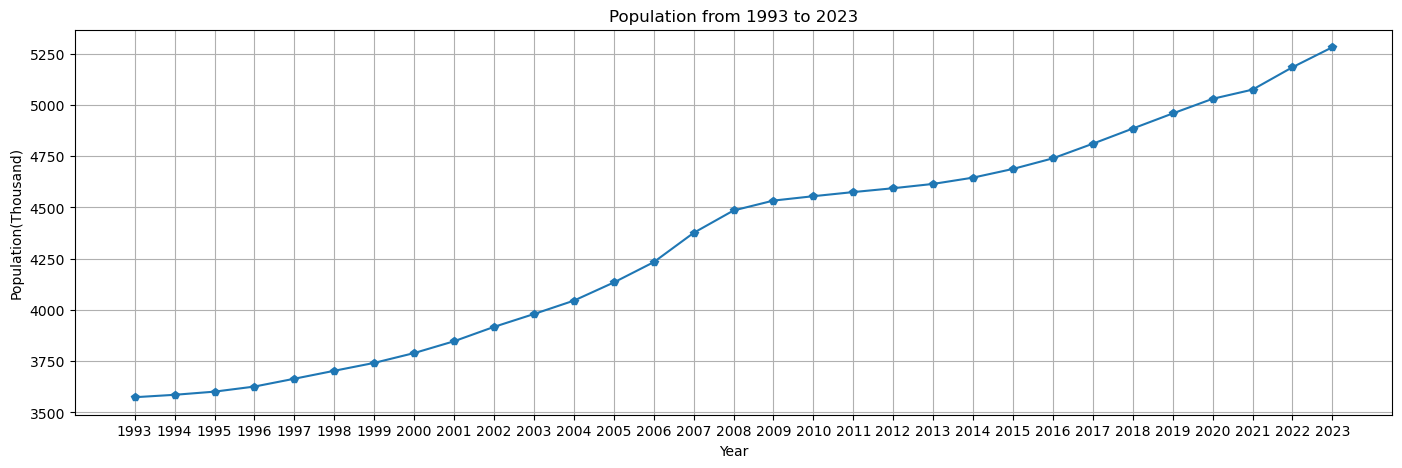

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population') #Population are selected .
population_data= data[filtre] #name is created 
values = population_data['VALUE'] #Variables are defined
years = population_data['Year'] #Variables are defined

plt.figure(figsize=(17, 5)) #Displaying size is adjusted .
plt.plot(years, values , marker='p') #Values are borught and crashing places are marked 
plt.title("Population from 1993 to 2023") #Title name is given
plt.xlabel("Year") #X label name is given
plt.ylabel("Population(Thousand)") #Y label name is given
plt.grid(True) #Grid are assigned
plt.xticks(years) #Years are extended .

plt.show() #Plot ise showed .

Let's have a look bar displaying .

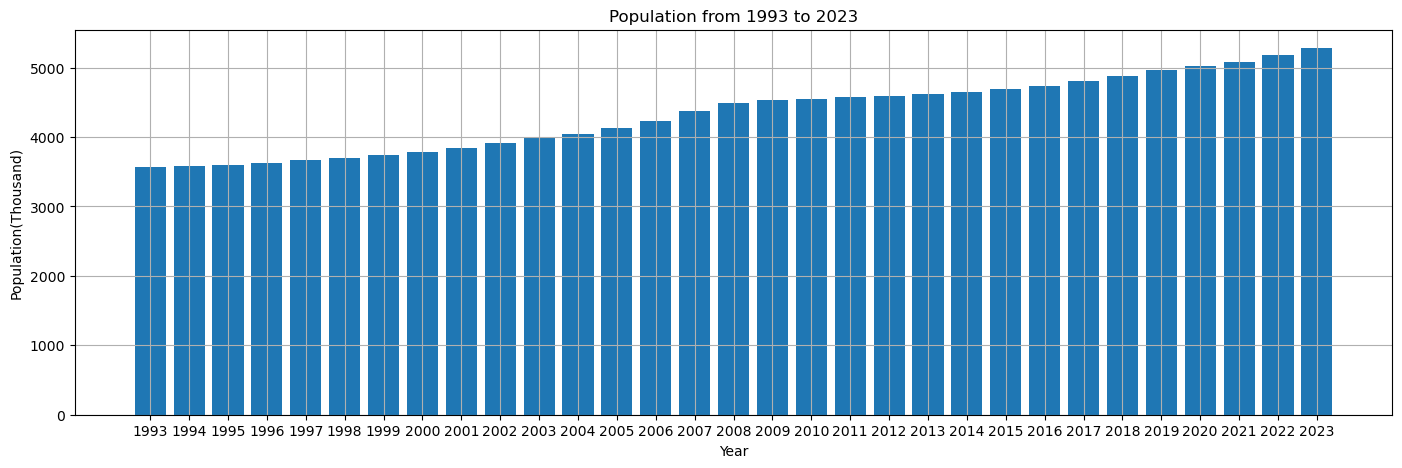

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population') 
population_data= data[filtre] 
values = population_data['VALUE'] 
years = population_data['Year'] 

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Population from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Population(Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's have a look heatmap displaying 

C:\Users\HP\AppData\Local\Temp\ipykernel_4276\2661915652.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = population_data.pivot('Year', 'Component', 'VALUE' , )


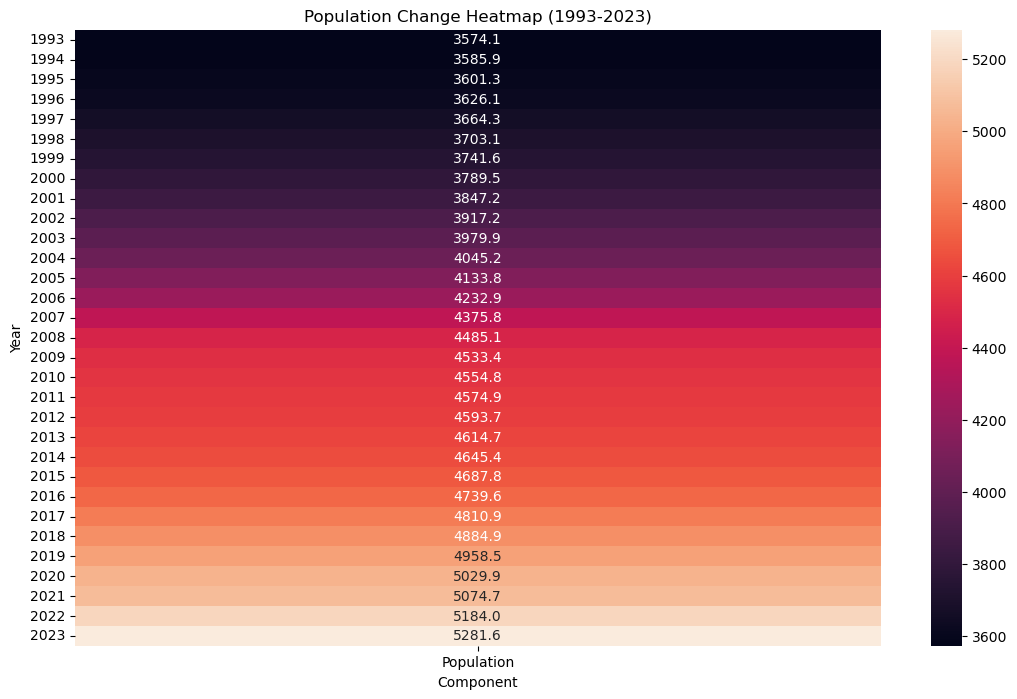

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Population')
population_data = data[filtre]
heatmap_data_1993_2023 = population_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title('Population Change Heatmap (1993-2023)')
plt.show()

Let's see Natural Increase datas being plot .

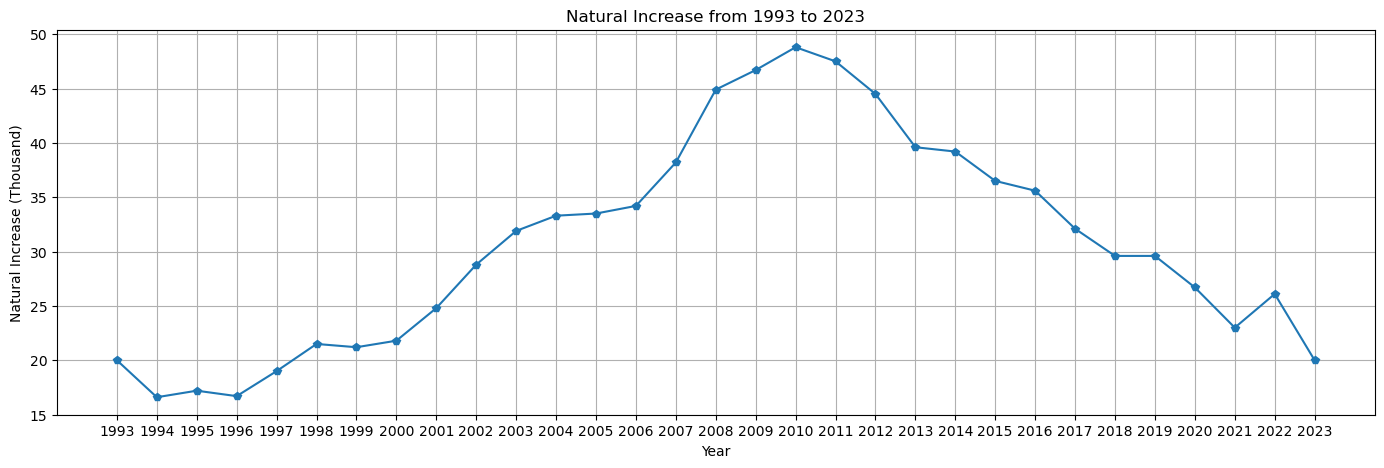

In [283]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase') #Natural İncreaes are selected .
natural_increase_data= data[filtre] #name is created 
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural Increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Natural Increase datas being bar .

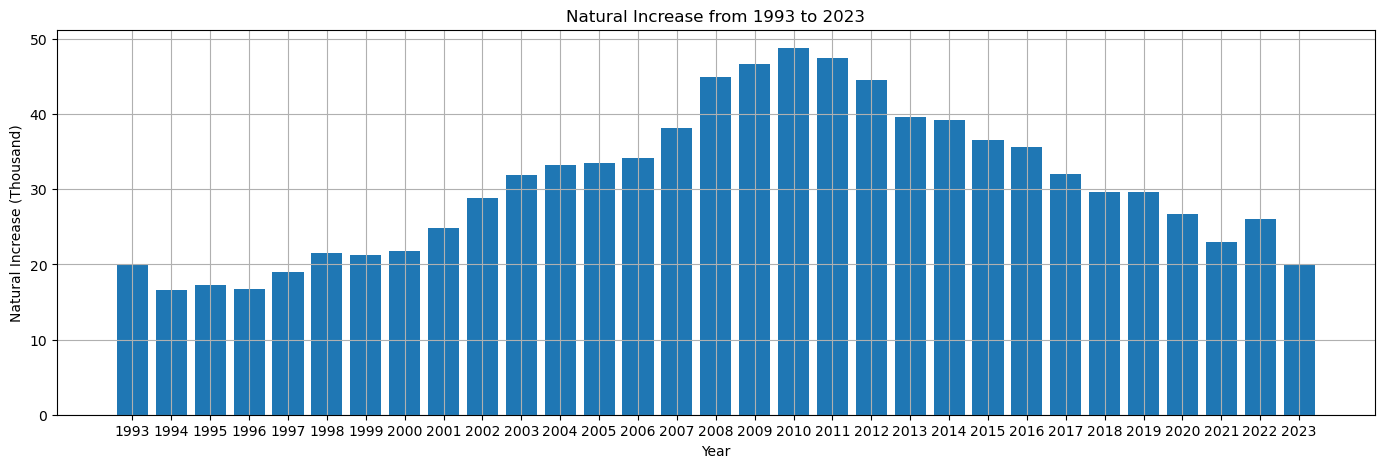

In [278]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase')
natural_increase_data= data[filtre] #name is created 
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural Increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Natural Increase datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_4276\3464095025.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = natural_increase_data.pivot('Year', 'Component', 'VALUE' , )


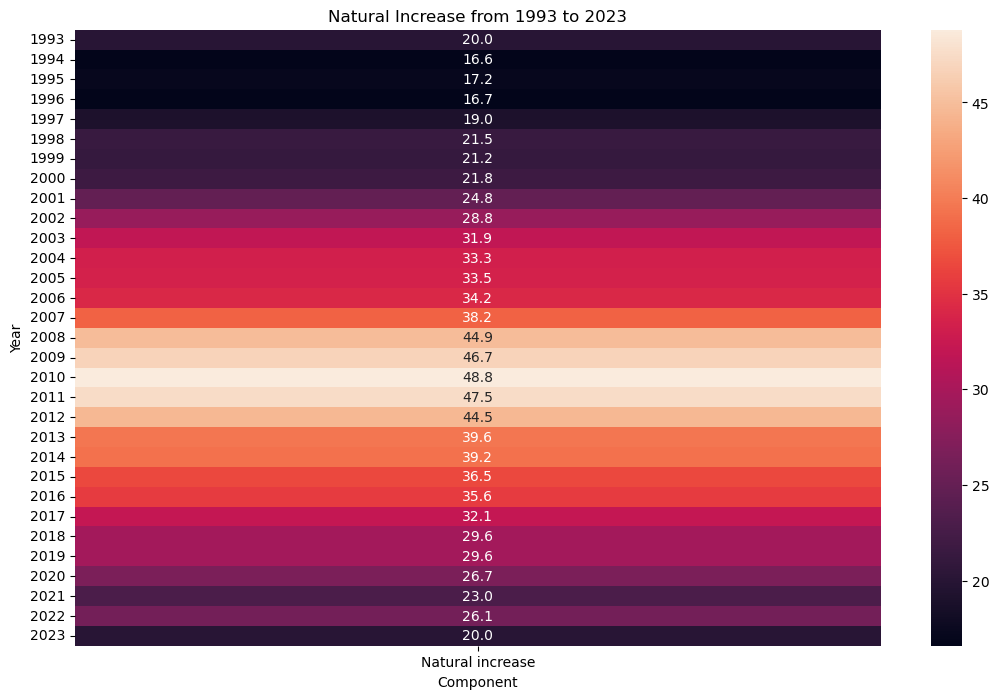

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == 'Natural increase')
natural_increase_data = data[filtre]
heatmap_data_1993_2023 = natural_increase_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Natural Increase from 1993 to 2023")
plt.show()

After all displaying we can say that there is no regular increasing for natural increase but we sincerely can say that every year natural increases are positive . What does it mean ? We are able to claim that population is fed by natural increase . As we have seen , strongly or weakly , every year annual births are more than annual deaths . Therefore there is no minus value on our graphs . This natural increase was in top at 2010 and was bottom at 1994 .

Let's see Net Migration datas being plot .

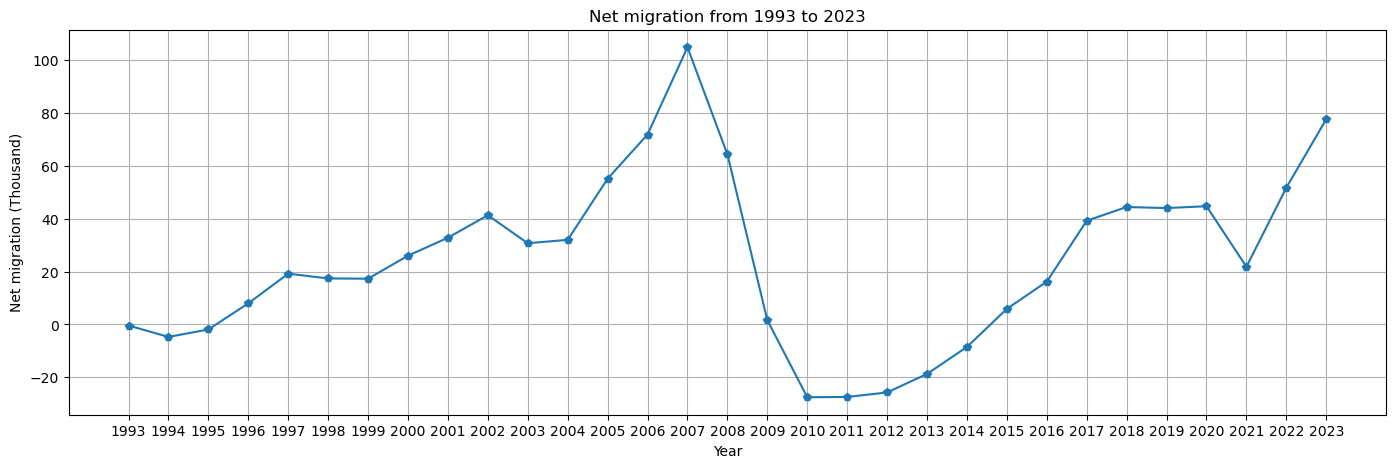

In [286]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") #Net migration is selected 
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values , marker='p')
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Net Migration datas being bar .

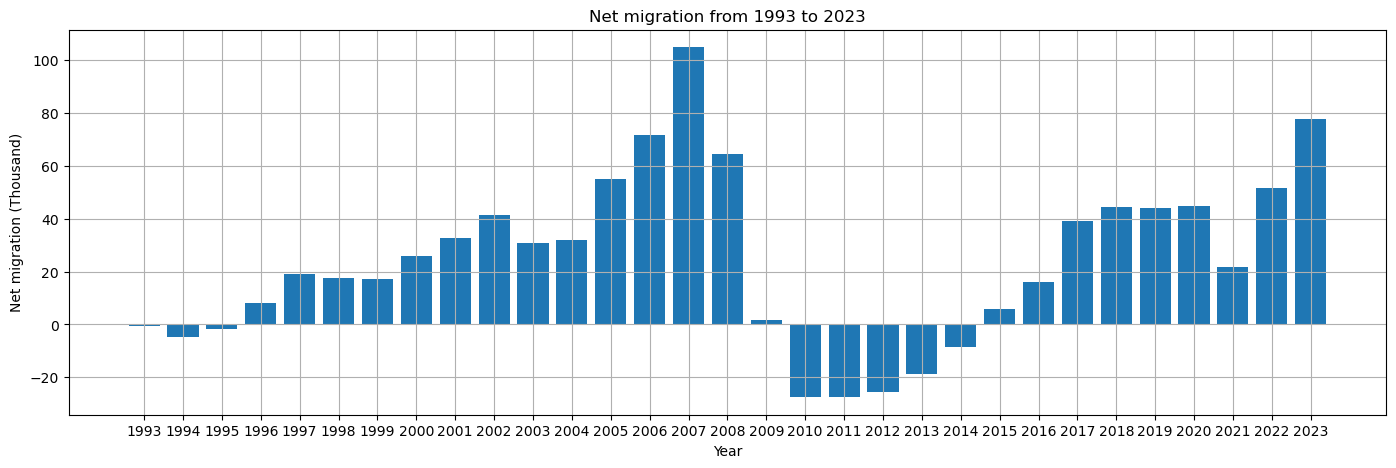

In [287]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") 
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 5))
plt.bar(years, values )
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see Net Migration datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_4276\3254265349.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = net_migration_data.pivot('Year', 'Component', 'VALUE' , )


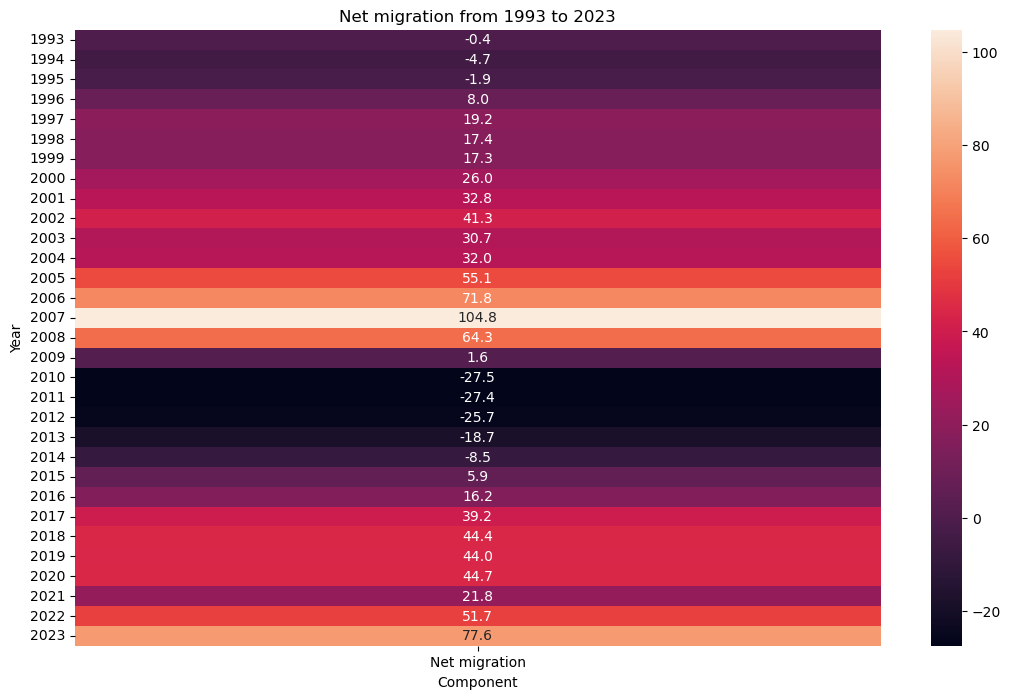

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration") 
net_migration_data= data[filtre]
heatmap_data_1993_2023 = net_migration_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Net migration from 1993 to 2023")
plt.show()

When we have a look Net migration graphs , directly to say something about regular increasing or discreasing is too hard . Because as you have seen after 2009 until 2015 net migration has minus values . What does it mean ? Magnitude of immigrations are more than magnitude of emigrants . This value is max at 2007 and min is at 2010 . And also 2023 is second big value for net migration . Let's see separately immigrations and emigrants values . 

Let's see immigrants datas being plot .

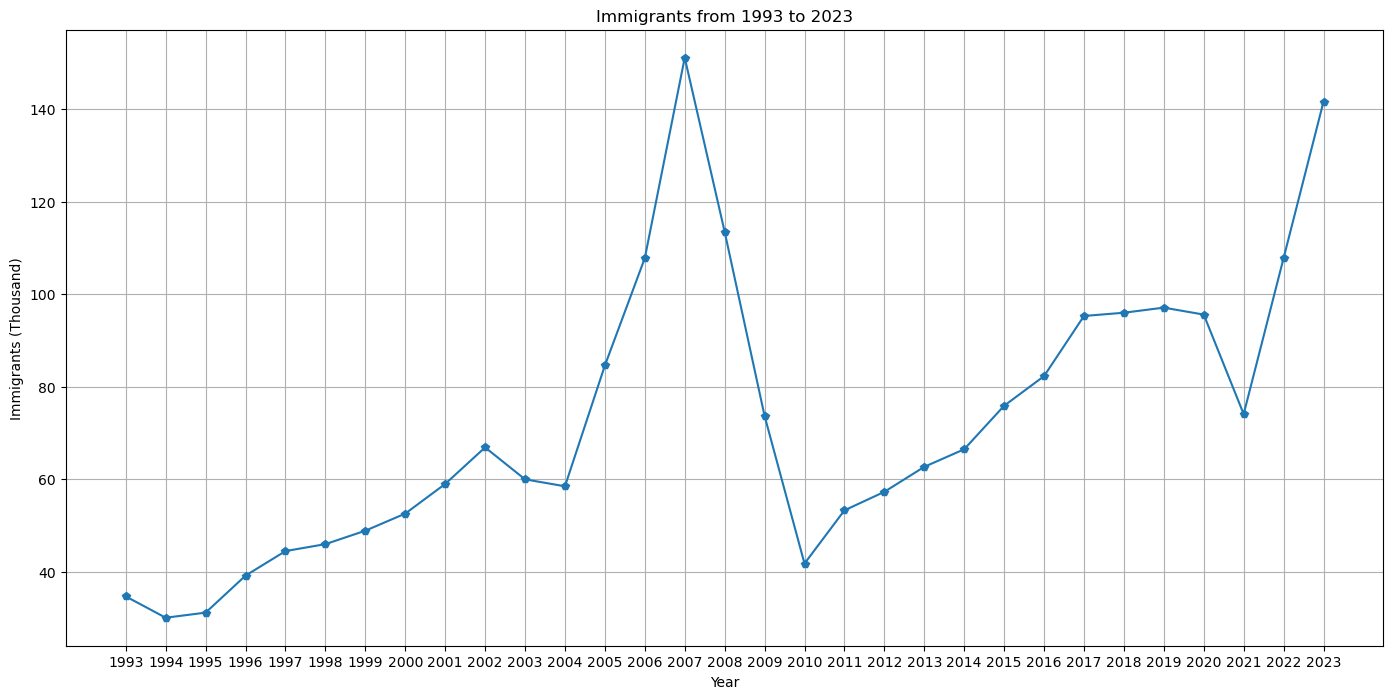

In [289]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants") #Immigrants are selected .
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values , marker='p')
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see immigrants datas being bar .

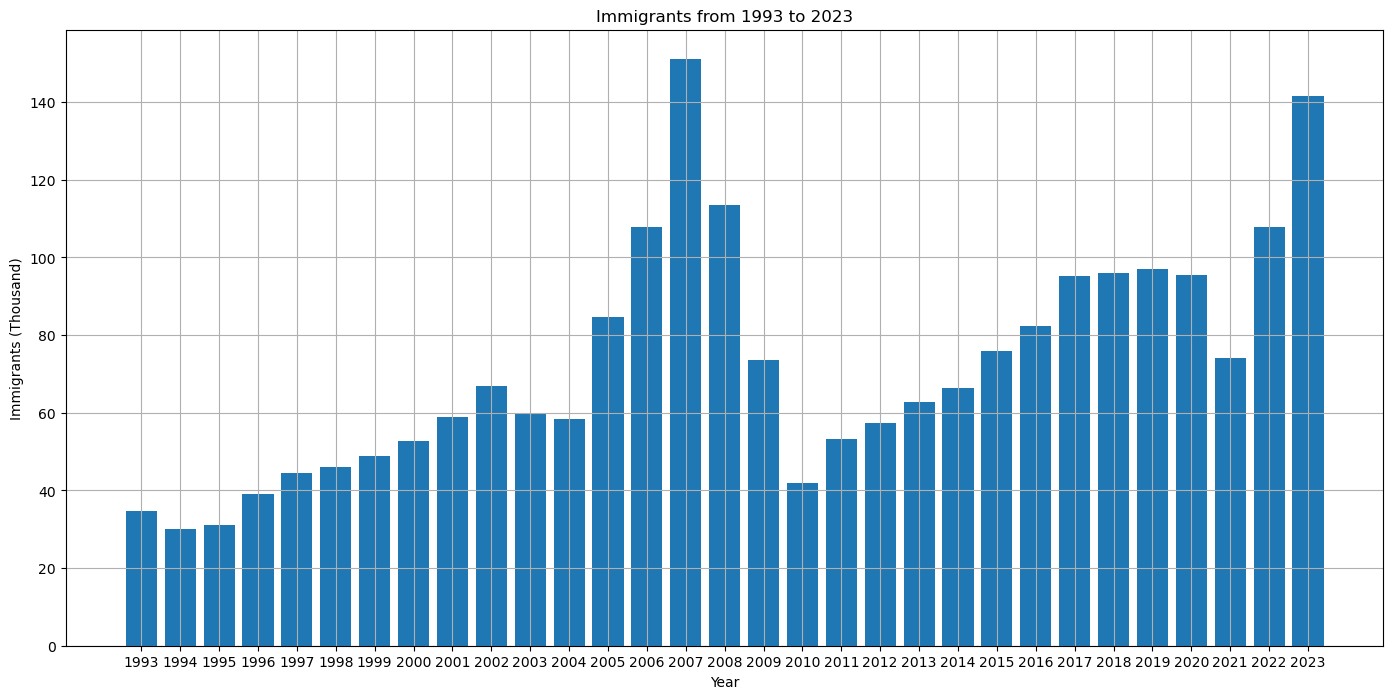

In [290]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants") 
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.bar(years, values )
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see immigration datas being heatmap .

C:\Users\HP\AppData\Local\Temp\ipykernel_4276\1210600470.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = immigrants_data.pivot('Year', 'Component', 'VALUE' , )


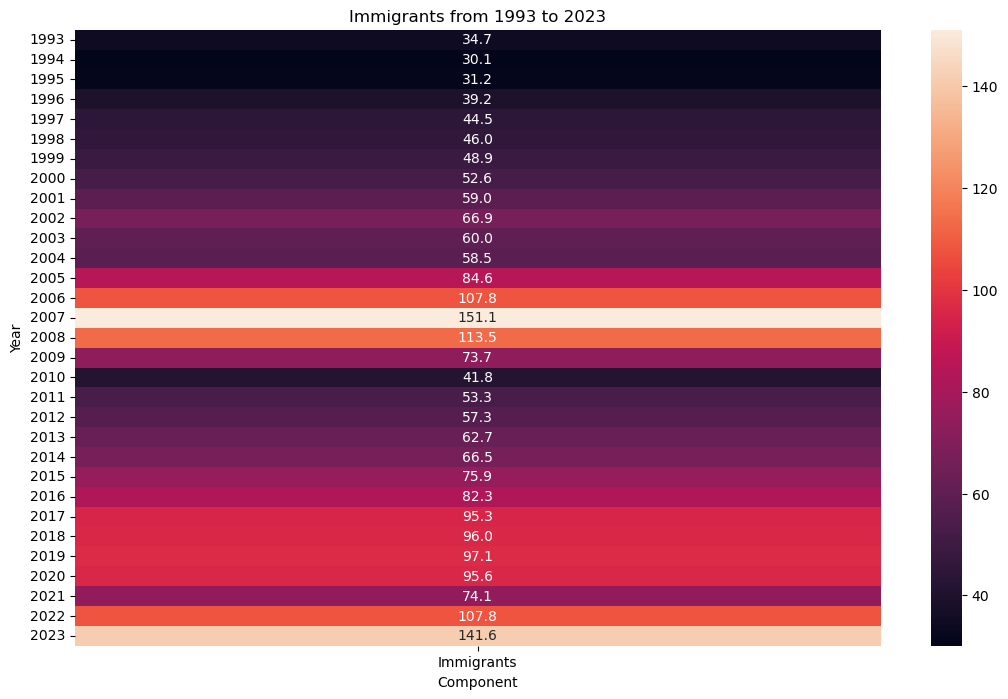

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants")
immigrants_data= data[filtre]
heatmap_data_1993_2023 = immigrants_data.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Immigrants from 1993 to 2023")
plt.show()

As we can see , if we ignore 1993-1997 , that's obvious every year Ireland accepts more than 40.000 immigrants . At 2007 immigrants are max and second max value is settled at 2023 . When we have a look net migration values , we are able to understand that they are parallel . They have pig at same year . 

Let's see emigrants datas being plot .

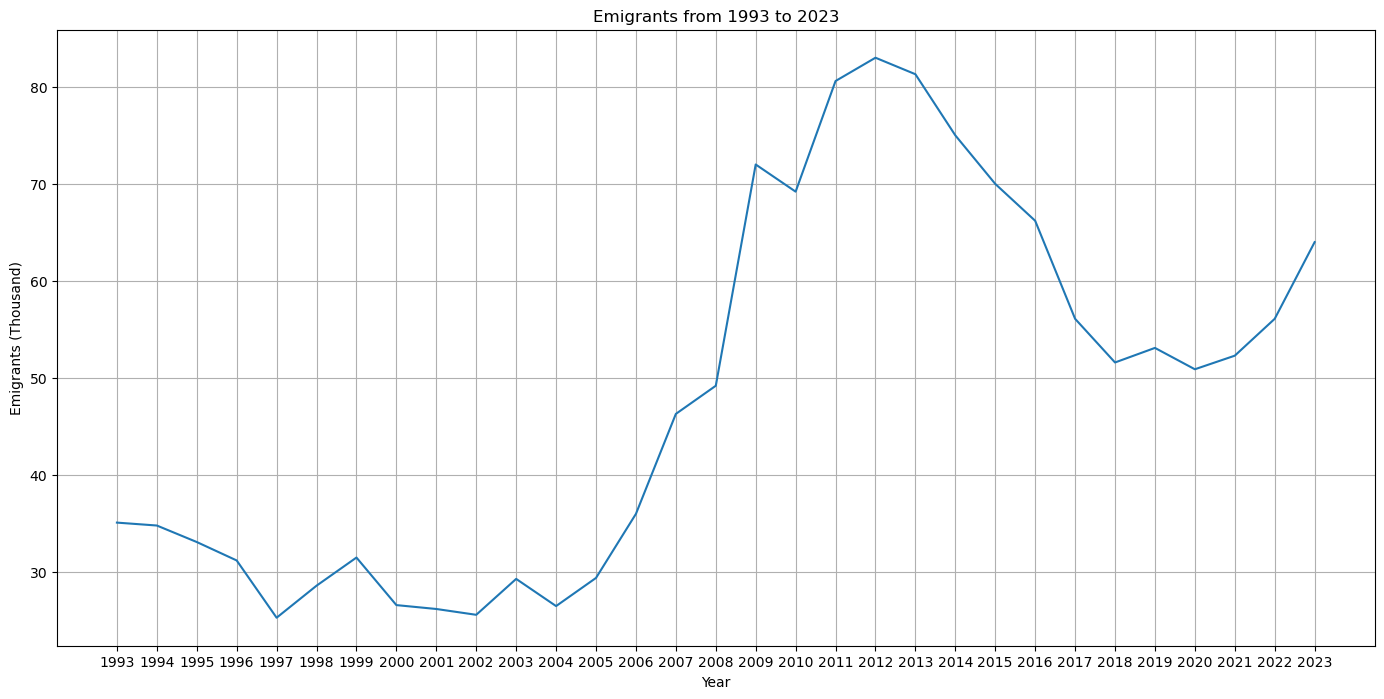

In [292]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") #Emigrants were chosen .
emigrants_1993_2023= data[filtre]
values = emigrants_1993_2023['VALUE']
years = emigrants_1993_2023['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see emigrants datas being bar 

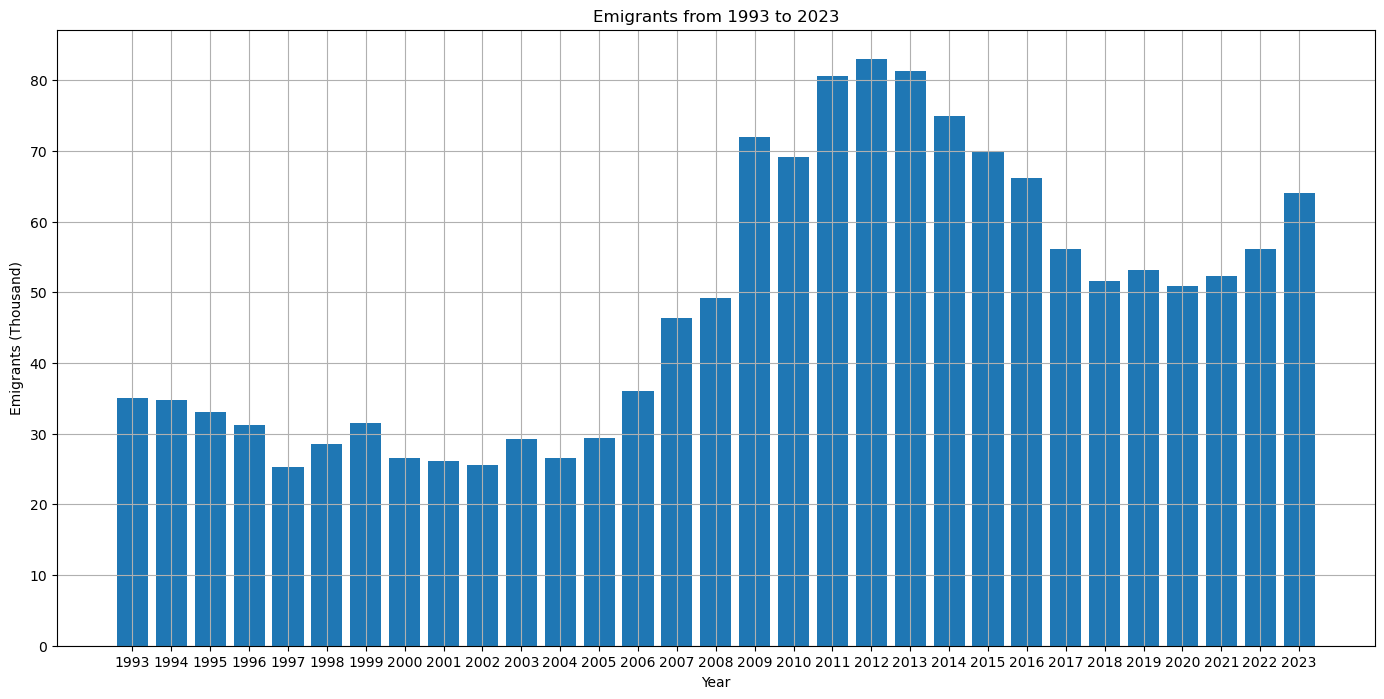

In [293]:
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") #Emigrants were chosen .
emigrants_1993_2023= data[filtre]
values = emigrants_1993_2023['VALUE']
years = emigrants_1993_2023['Year']

plt.figure(figsize=(17, 8))
plt.bar(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

Let's see emigrants datas being heatmap.

C:\Users\HP\AppData\Local\Temp\ipykernel_4276\157768633.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data_1993_2023 = emigrants_1993_2023.pivot('Year', 'Component', 'VALUE' , )


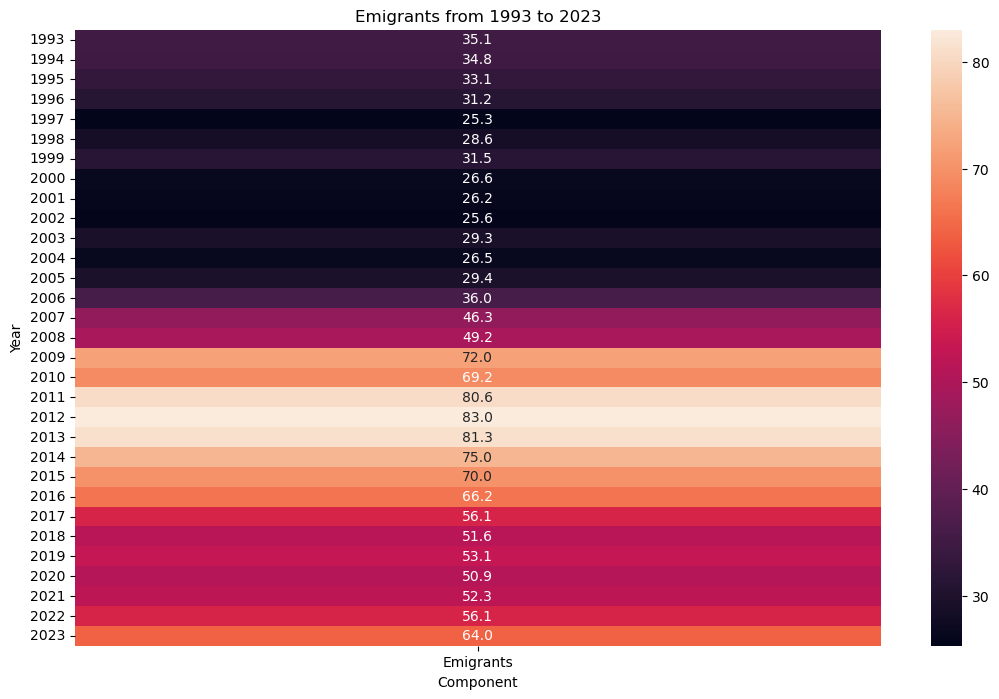

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')

filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants") 
emigrants_1993_2023= data[filtre]
heatmap_data_1993_2023 = emigrants_1993_2023.pivot('Year', 'Component', 'VALUE' , )

plt.figure(figsize=(13, 8))
sns.heatmap(heatmap_data_1993_2023, annot=True , fmt=".1f",)
plt.title("Emigrants from 1993 to 2023")
plt.show()

As we can see , every year Ireland looses more than 25.000 emigrants . At 2012 emigrants are max and min value is settled at 1997 . When we have a look net emigrants values , we are able to understand that last 3 years magnitude of emigrants are going up . But to say something regularly increase is hard . Values are irregular and every year they change.

Let's see ın last 30 years , immigrants and emigrants together . We can see clearly what kind of correlation they have .

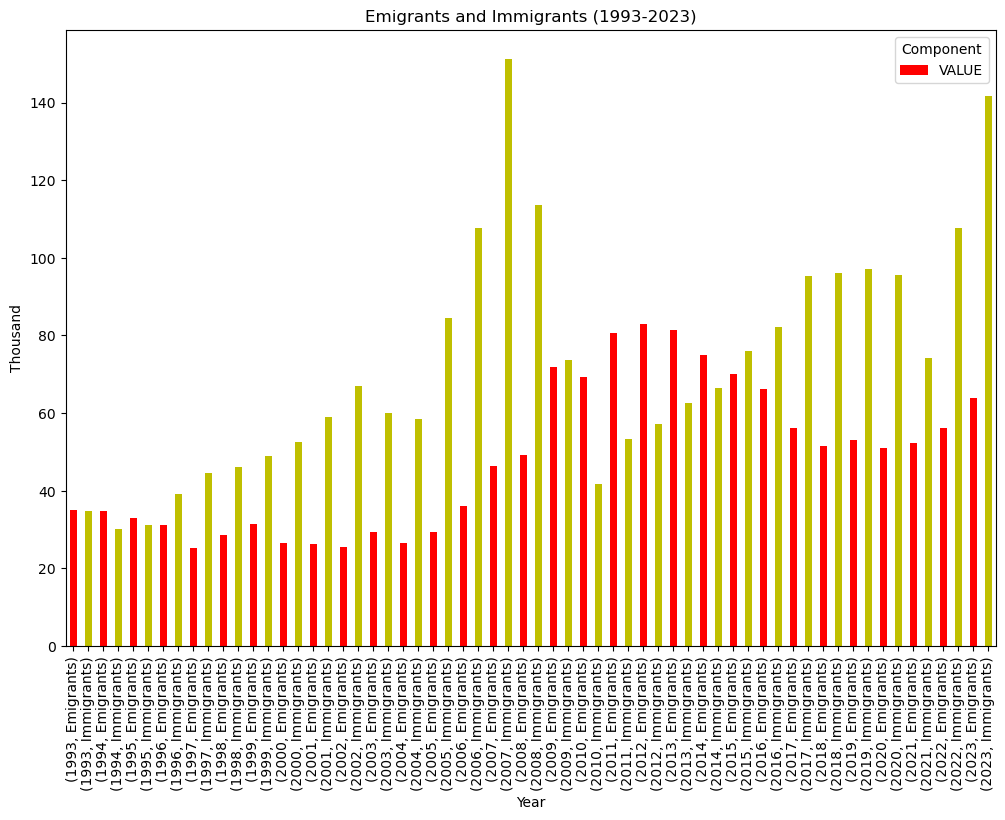

In [305]:
import matplotlib.pyplot as plt
data = pd.read_csv('PEA15.20231021T091018.csv')
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'].isin(['Emigrants', 'Immigrants']))
emigrants_immigrants_display_data = data[filtre]
grouped_data = emigrants_immigrants_display_data.groupby(['Year', 'Component'])['VALUE'].sum()
colors = ['r', 'y'] #For values colors are assigned . Emigrants will showed by red color , immigrants will showed by yellow color .

grouped_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Emigrants and Immigrants (1993-2023)')
plt.xlabel('Year')
plt.ylabel('Thousand')
plt.legend(title='Component')
plt.show()